In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import seaborn as sns

### Resolution

In [2]:
images_metadata_dataframe = pd.read_csv("./images_metadata.csv")
image_width = images_metadata_dataframe["image_width"]
image_height = images_metadata_dataframe["image_height"]
images_metadata_dataframe["resolution"] = image_width*image_height
filenames = images_metadata_dataframe["filename"].unique()

In [3]:
unique_filenames_and_resolutions_df = images_metadata_dataframe[
    ["filename", "resolution"]
].drop_duplicates("filename").reset_index(drop=True)

In [4]:
resolutions = unique_filenames_and_resolutions_df["resolution"]

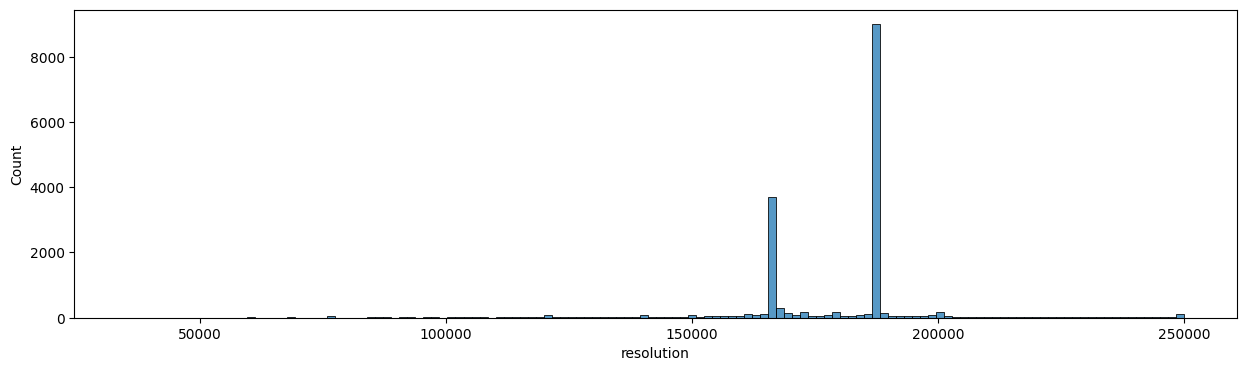

In [9]:
plt.figure(figsize=(15, 4))
sns.histplot(data=resolutions)
plt.show()

In [42]:
224*224

50176

In [43]:
print(224*224)
print(320*320)
print(448*448)

50176
102400
200704


### Object width and height

In [10]:
classes = images_metadata_dataframe["class"].unique()
objects_widths = []
objects_heights = []
objects_list = []
for _class_ in classes:
    columns = ["w", "h"]
    whs = images_metadata_dataframe[columns][images_metadata_dataframe["class"] == _class_]
    objects_list += [_class_]*len(whs)
    objects_widths += whs["w"].to_list()
    objects_heights += whs["h"].to_list()
df = pd.DataFrame({"objects_widths":objects_widths, "objects_heights":objects_heights, "objects_list":objects_list})

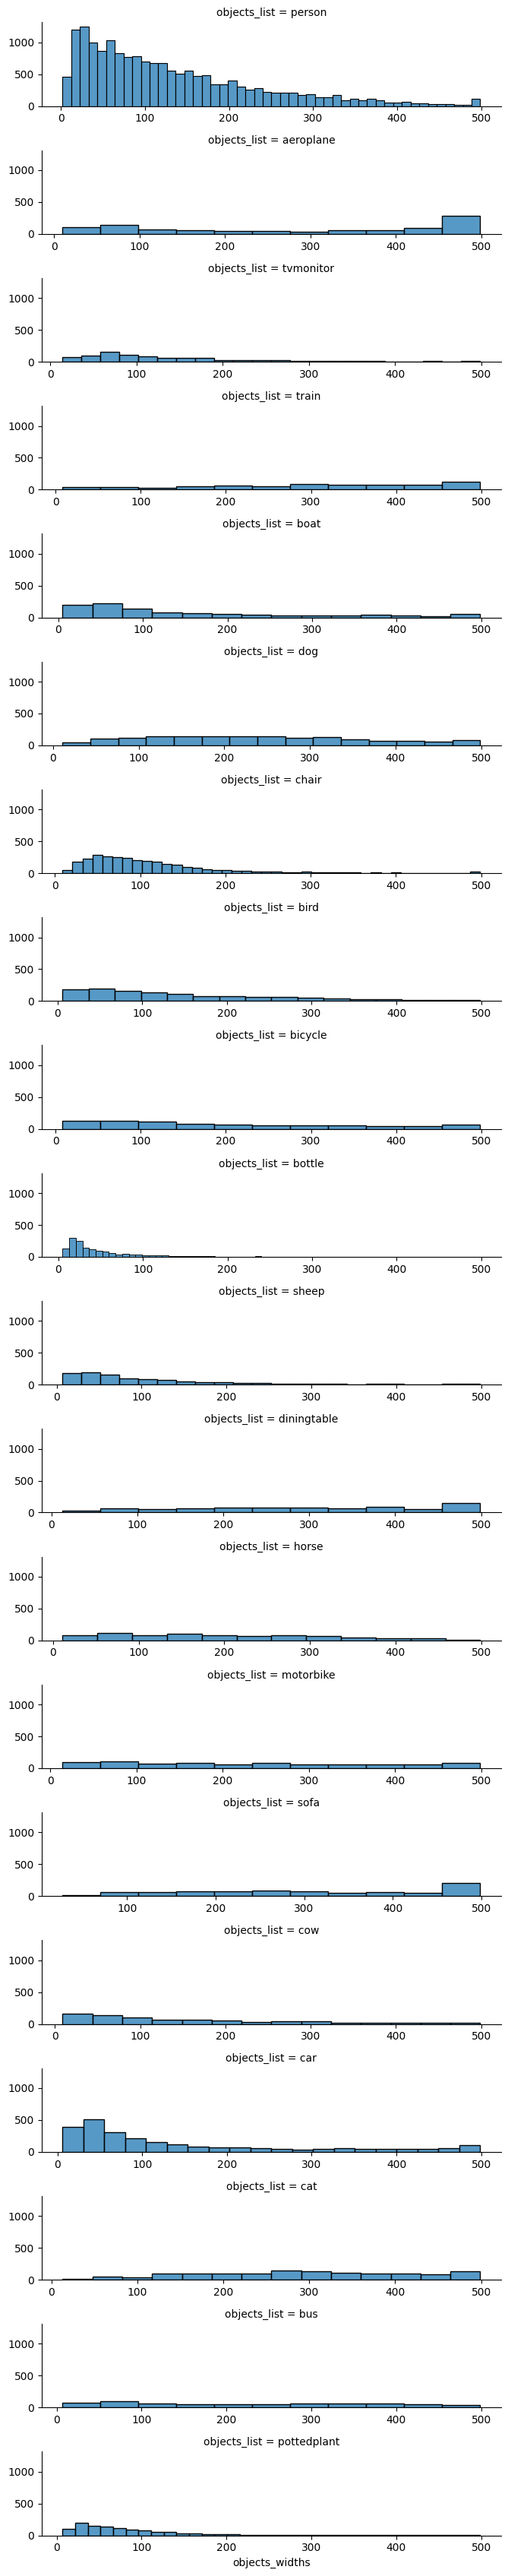

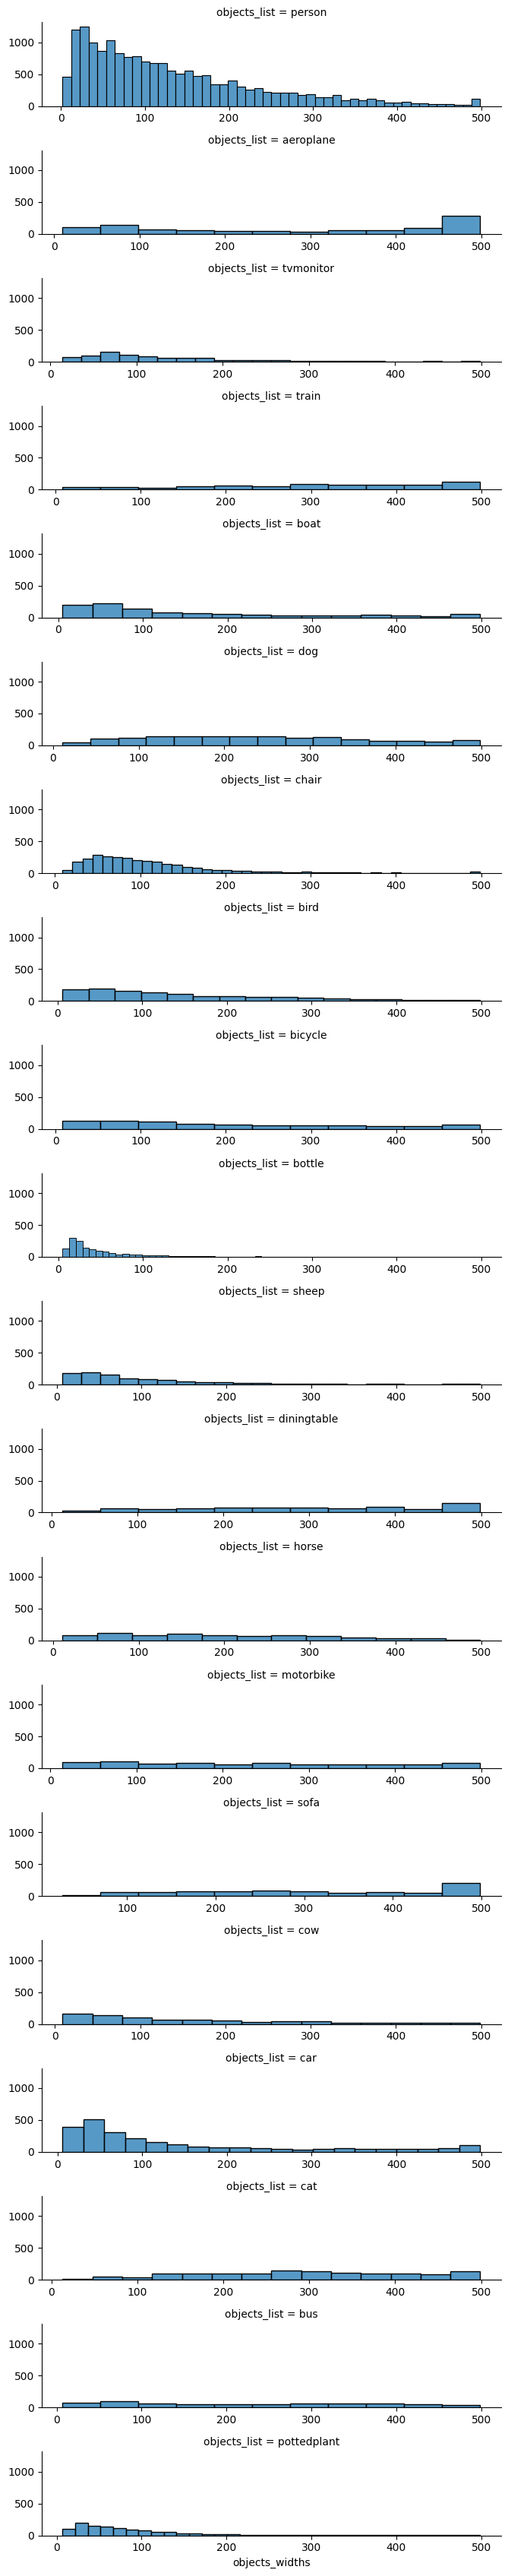

In [12]:
g = sns.FacetGrid(df, row="objects_list", 
                  height=1.7, aspect=4, sharex=False)
g_map = g.map(sns.histplot, "objects_widths")
plt.show()

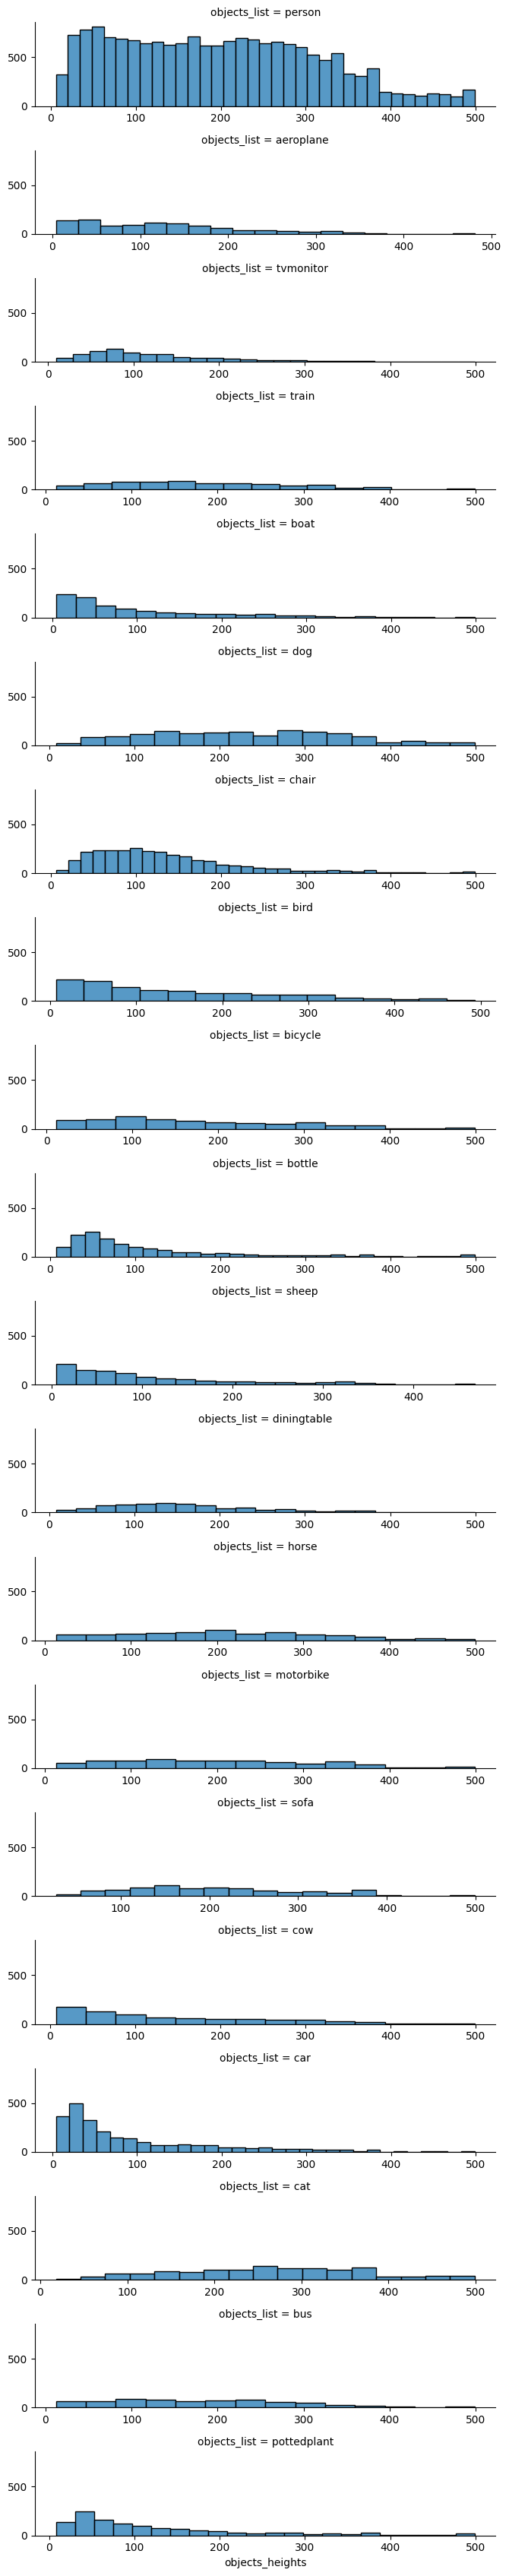

In [13]:
g = sns.FacetGrid(df, row="objects_list", 
                  height=1.7, aspect=4, sharex=False)
g_map = g.map(sns.histplot, "objects_heights")
plt.show()

### Whether there is an interesting sctterplot for objects width and height

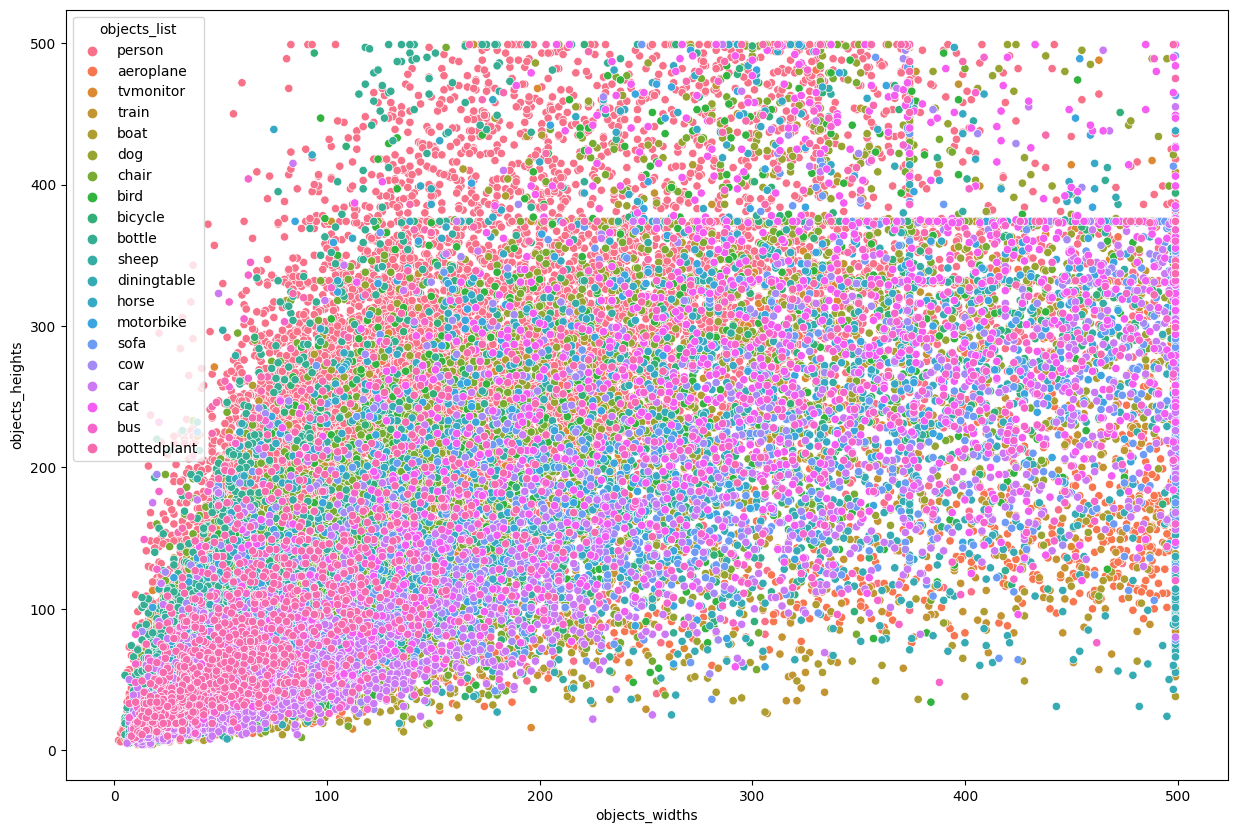

In [17]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(data=df, x="objects_widths", y="objects_heights", hue="objects_list")
plt.show()

### If 50X50 is small objects, how many?

In [18]:
len(df[(df.objects_widths <= 50) | (df.objects_heights <= 50)]) / len(images_metadata_dataframe)

0.2714883651402661

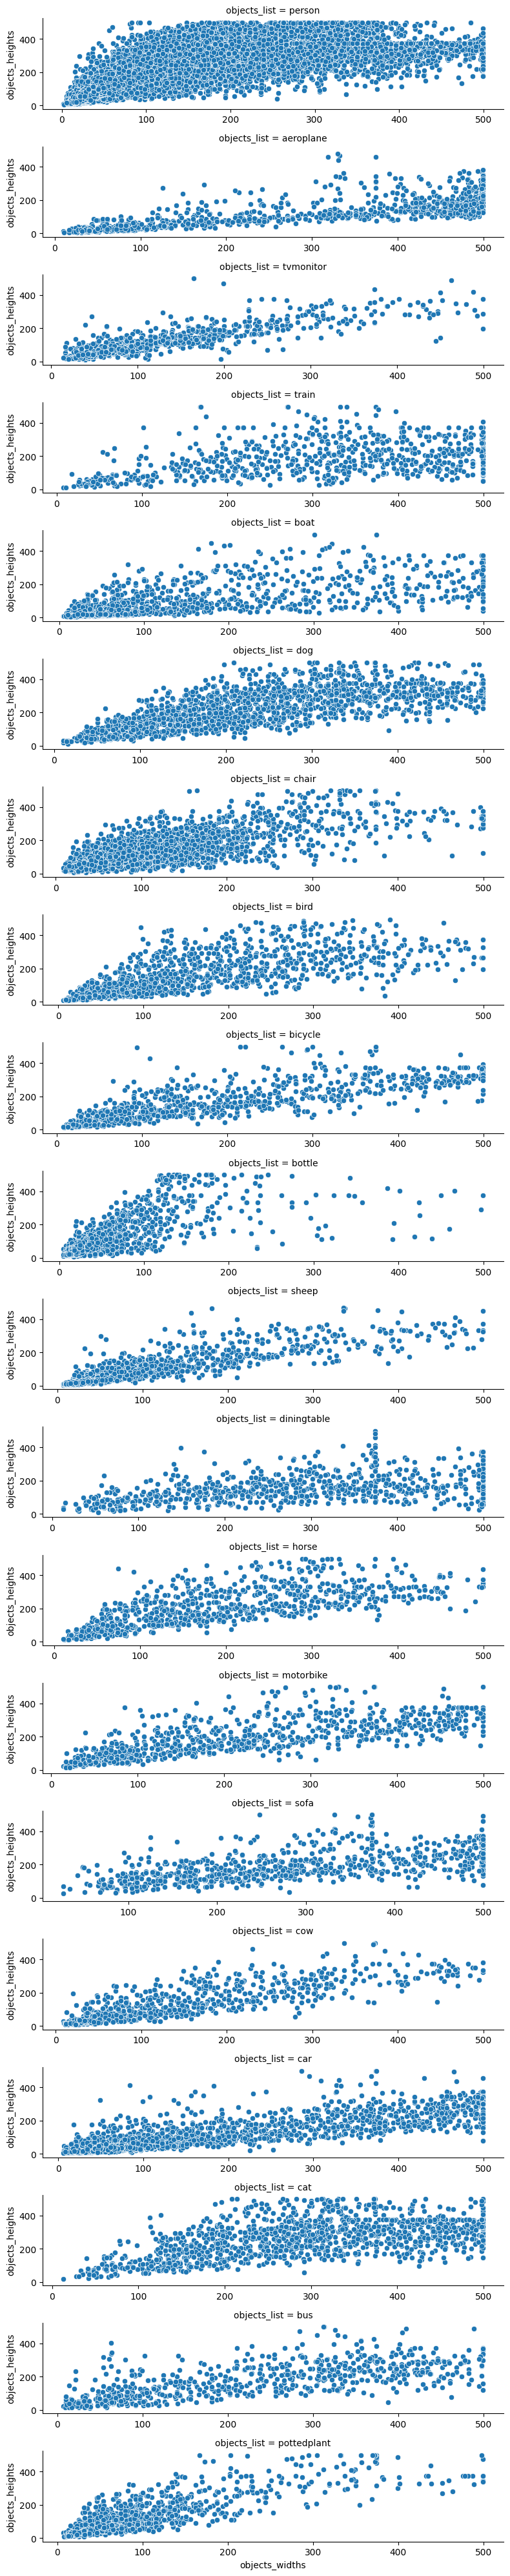

In [19]:
g = sns.FacetGrid(df, row="objects_list", 
                  height=2, aspect=4, sharex=False)
g_map = g.map(sns.scatterplot, "objects_widths", "objects_heights")
plt.show()